In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/dataset.csv")

In [3]:
print("🔍 Dataset Shape:", df.shape)
print("\n🧾 Columns:\n", df.columns.tolist())
df.head()


🔍 Dataset Shape: (480, 17)

🧾 Columns:
 ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']


gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M

In [4]:
# ℹ️ Info and Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
# 🔎 Missing Values
print("\n❓ Missing Values:\n", df.isnull().sum())


❓ Missing Values:
 gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [6]:
# 🎯 Check Target Column - usually 'Class'
print("\n📊 Class Distribution:\n", df['Class'].value_counts())


📊 Class Distribution:
 Class
M    211
H    142
L    127
Name: count, dtype: int64


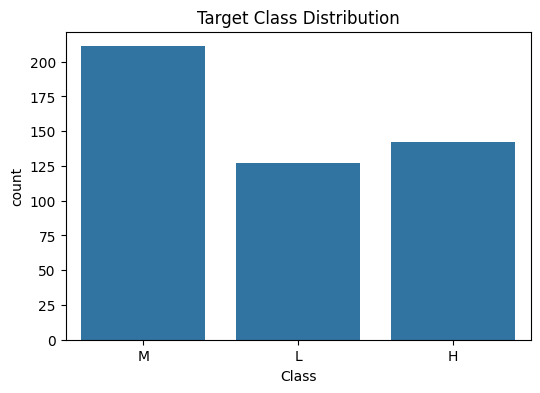

In [7]:
# 📈 Visualize Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Target Class Distribution")
plt.savefig('../eda/target_class_distribution.png')
plt.show()

In [8]:
# 📊 Describe Numeric Features
df.describe()

raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000

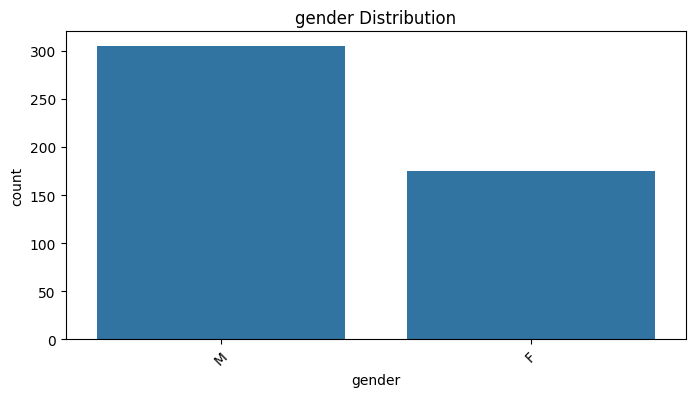

In [9]:
cat_cols = ['gender',]

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.savefig(f'../eda/{col}_distribution.png')
    plt.show()


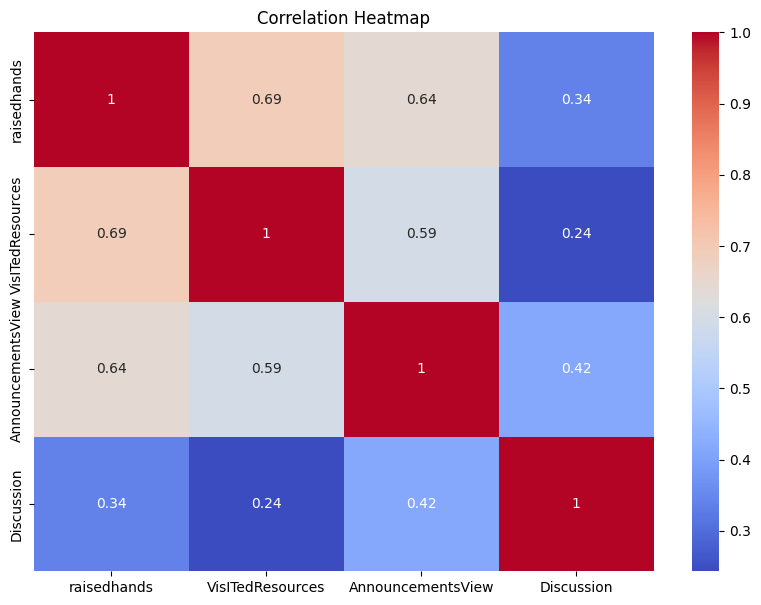

In [10]:
# 🔑 Correlation (for numeric only)
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('../eda/correlation_heatmap.png')
plt.show()
